In [75]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Analyze Validation Results

In [76]:
base_dir = "./outputs/2024-04-21/21-54-42/outputs/eval/"
eval_tokens = []
eval_rewards = []

f1s = []
ems = []
lengths = []
for i in range(500, 6500, 500):
    with open(f'{base_dir}outputs.step.{i}.json', 'r') as f:
        eval_result = json.load(f)
        eval_rewards.append(eval_result['scores'])
        eval_tokens.append(eval_result['output_tokens'])
        f1s.append(eval_result['score_log']['f1_scores'])
        ems.append(eval_result['score_log']['em_scores'])
        lengths.append(eval_result['score_log']['len_score'])


In [77]:
eval_rewards = np.asarray(eval_rewards)

In [125]:
# np.asarray(eval_result['score_log']['em_scores']).shape
eval_rewards.shape

(12, 2400)

In [79]:
mean_rewards = eval_rewards.mean(axis=1)

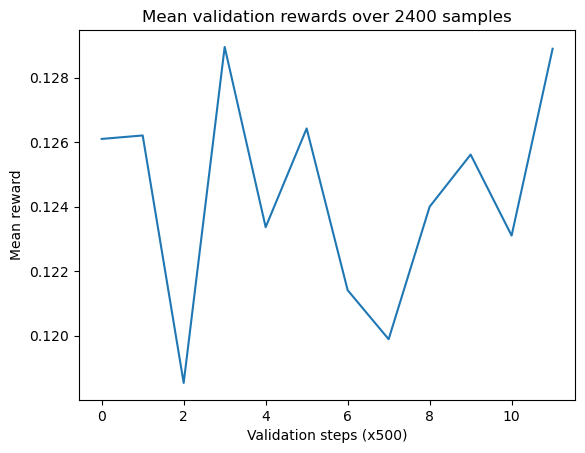

In [80]:
fig, ax = plt.subplots()
ax.set_title("Mean validation rewards over 2400 samples")
ax.set_xlabel("Validation steps (x500)")
ax.set_ylabel("Mean reward")
ax.plot(mean_rewards)
plt.show()

In [81]:
ems = np.asarray(ems)
f1s = np.asarray(f1s)
lens = np.asarray(lengths)

In [82]:
ems.shape

(12, 8, 48)

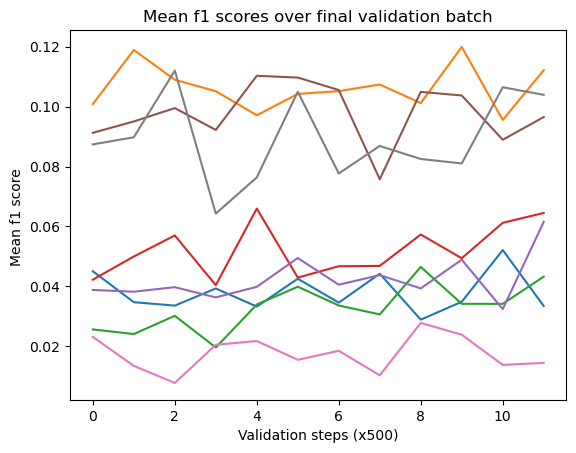

In [123]:
fig, ax = plt.subplots()
ax.set_title("Mean f1 scores over final validation batch")
ax.set_xlabel("Validation steps (x500)")
ax.set_ylabel("Mean f1 score ")
for i in range(8):
    ax.plot(f1s[:, i].mean(axis=1), label=f'sample {i}')

# plt.legend()
plt.show()


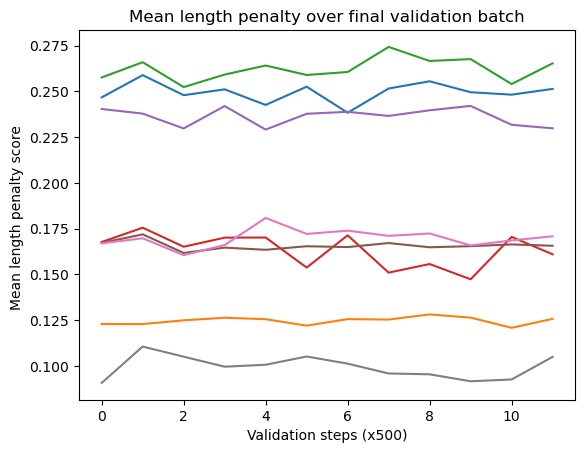

In [124]:
fig, ax = plt.subplots()
ax.set_title("Mean length penalty over final validation batch")
ax.set_xlabel("Validation steps (x500)")
ax.set_ylabel("Mean length penalty score ")
for i in range(8):
    ax.plot(lens[:, i].mean(axis=1), label=str(i))

In [85]:
train_log_output_file = "./outputs/2024-04-21/21-54-42/outputs/eval/training_log.epoch.1.json"

with open(train_log_output_file, 'r') as f:
    tr_data = json.load(f)
    

In [86]:
print(tr_data[0].keys())

dict_keys(['SQL_ON/rewards/em_scores', 'SQL_ON/rewards/f1_scores', 'SQL_ON/rewards/len_score', 'SQL_ON/loss', 'SQL_ON/sequence_length', 'SQL_ON/loss-normalized', 'SQL_ON/v2/0/Q/min', 'SQL_ON/v2/0/Q/max', 'SQL_ON/v2/0/Q/mean', 'SQL_ON/v2/0/V/min', 'SQL_ON/v2/0/V/max', 'SQL_ON/v2/0/V/mean', 'SQL_ON/v2/0/A/min', 'SQL_ON/v2/0/A/max', 'SQL_ON/v2/0/A/mean', 'SQL_ON/v2/0/Q_/min', 'SQL_ON/v2/0/Q_/max', 'SQL_ON/v2/0/Q_/mean', 'SQL_ON/v2/0/V_/min', 'SQL_ON/v2/0/V_/max', 'SQL_ON/v2/0/V_/mean', 'SQL_ON/v2/0/A_/min', 'SQL_ON/v2/0/A_/max', 'SQL_ON/v2/0/A_/mean', 'SQL_ON/v2/0/H/min', 'SQL_ON/v2/0/H/max', 'SQL_ON/v2/0/H/mean', 'SQL_ON/v2/0/H_/min', 'SQL_ON/v2/0/H_/max', 'SQL_ON/v2/0/H_/mean', 'SQL_ON/v3/0/Q/min', 'SQL_ON/v3/0/Q/max', 'SQL_ON/v3/0/Q/mean', 'SQL_ON/v3/0/V/min', 'SQL_ON/v3/0/V/max', 'SQL_ON/v3/0/V/mean', 'SQL_ON/v3/0/A/min', 'SQL_ON/v3/0/A/max', 'SQL_ON/v3/0/A/mean', 'SQL_ON/v3/0/V_/min', 'SQL_ON/v3/0/V_/max', 'SQL_ON/v3/0/V_/mean', 'SQL_ON/rewards/raw', 'SQL_ON/rewards/shaped'])


In [87]:
tr_ems = []
tr_f1s = []
tr_rewards = []
tr_rewards_shaped = []
tr_lens = []
tr_loss = []
for tr in tr_data:
    
    tr_ems.append(tr['SQL_ON/rewards/em_scores'])
    tr_f1s.append(tr['SQL_ON/rewards/f1_scores'])
    tr_rewards.append(tr['SQL_ON/rewards/raw'])
    tr_rewards_shaped.append(tr['SQL_ON/rewards/shaped'])
    tr_lens.append(tr['SQL_ON/rewards/len_score'])
    tr_loss.append(tr['SQL_ON/loss'])

In [118]:
tr_ems.shape

(6000, 3, 48)

In [136]:
tr_ems = np.asarray(tr_ems)
tr_f1s = np.asarray(tr_f1s)
tr_rewards = np.asarray(tr_rewards)
tr_rewards_shaped = np.asarray(tr_rewards_shaped)
tr_lens = np.asarray(tr_lens)
tr_loss = np.asarray(tr_loss)

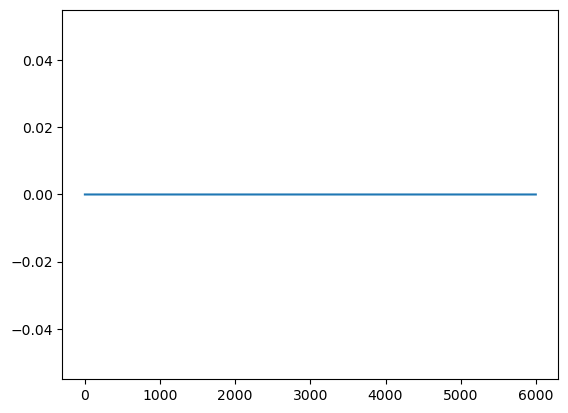

In [89]:
plt.plot(tr_ems.mean(axis=1).mean(axis=1))

In [126]:
tr_f1s.shape

(6000, 3, 48)

In [164]:
k = 3
l = 16
bootstrap_f1s = []
bootstrap_lens = []
for i in range(k):
    print(tr_f1s[:, :, i*l//k:(i+1)*l//k].shape)
    bootstrap_f1s.append(tr_f1s[:, :, i*l//k:(i+1)*l//k].max(axis=2))# [k, l/k]
    bootstrap_lens.append(tr_lens[:, :, i*l//k:(i+1)*l//k].max(axis=2))
# We use different rewards for each bootstrap for now
bootstrap_f1s = np.asarray(bootstrap_f1s)
bootstrap_lens = np.asarray(bootstrap_lens)
print(bootstrap_lens.shape)

(6000, 3, 5)
(6000, 3, 5)
(6000, 3, 6)
(3, 6000, 3)


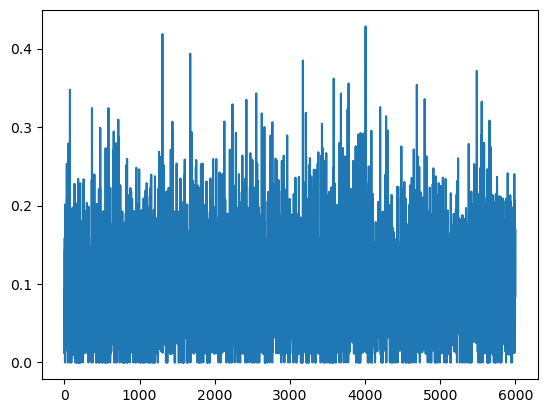

In [160]:
plt.plot(bootstrap_f1s.mean(axis=0).mean(axis=1))

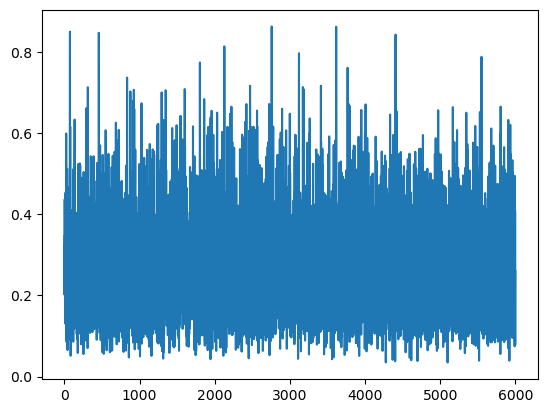

In [165]:
plt.plot(bootstrap_lens.mean(axis=0).mean(axis=1))

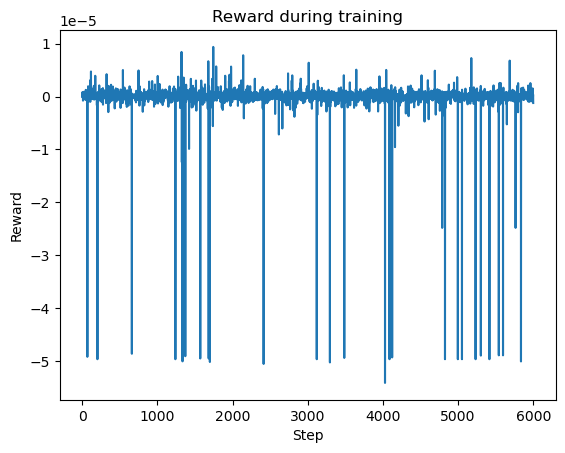

In [143]:
fig, ax = plt.subplots()
ax.set_title("Reward during training")
ax.set_ylabel("Reward")
ax.set_xlabel("Step")
plt.plot(tr_rewards)
plt.show()

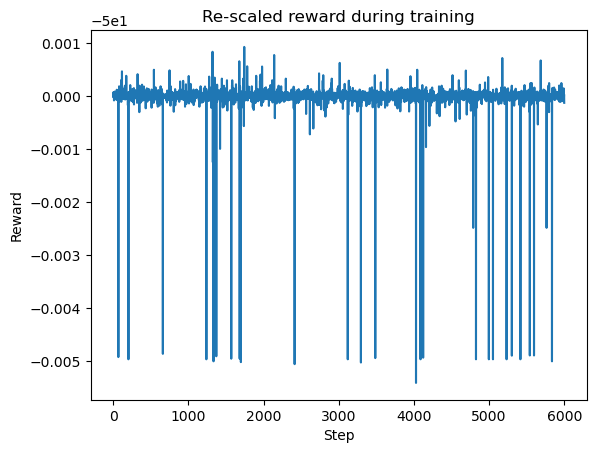

In [144]:
fig, ax = plt.subplots()
ax.set_title("Re-scaled reward during training")
ax.set_ylabel("Reward")
ax.set_xlabel("Step")
plt.plot(tr_rewards_shaped)
plt.show()

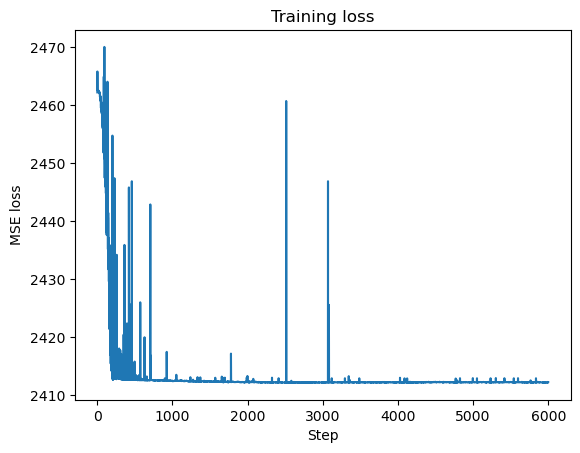

In [142]:
fig, ax = plt.subplots()
ax.set_title("Training loss")
ax.set_ylabel("MSE loss")
ax.set_xlabel("Step")
ax.plot(tr_loss)
plt.show()

In [166]:
eval_file = "./eval/outputs/2024-04-22/11-30-33/outputs.json"

with open(eval_file, 'r') as f:
    eval_data = json.load(f)

In [167]:
eval_data.keys()

dict_keys(['prompt', 'questions', 'gts', 'answers', 'em_scores', 'f1_scores', 'length_penalties', 'np_answers', 'np_em_scores', 'np_f1_scores', 'np_length_penalties'])

In [181]:
print(eval_data['questions'][0:5])
print()
print("real answers")
print(eval_data['gts'][0:5])
print()
print("prompted:")
print(eval_data['answers'][0:5])
print()
print("un-prompted:")
print(eval_data['np_answers'][0:5])



['In April, during the Revolution of 1848 in Paris, he left for London, where he performed at several concerts and at numerous receptions in great houses. This tour was suggested to him by his Scottish pupil Jane Stirling and her elder sister. Stirling also made all the logistical arrangements and provided much of the necessary funding. Where did Chopin go in the spring of 1848?', 'The first session ended in a solemn ceremony on 8 December 1962 with the next session scheduled to occur in 1963 from 12 May to 29 June – this was announced on 12 November 1962. John XXIII\'s closing speech made subtle references to Pope Pius IX, and he had expressed the desire to see Pius IX beatified and eventually canonized. In his journal in 1959 during a spiritual retreat, John XXIII made this remark: "I always think of Pius IX of holy and glorious memory, and by imitating him in his sacrifices, I would like to be worthy to celebrate his canonization". When was the next session announced?', 'Namibia is 

In [169]:
eval_ems = np.asarray(eval_data['em_scores'])
np_ems = np.asarray(eval_data['np_em_scores'])
eval_f1s = np.asarray(eval_data['f1_scores'])
np_f1s = np.asarray(eval_data['np_f1_scores'])
eval_lens = np.asarray(eval_data['length_penalties'])
np_lens = np.asarray(eval_data['np_length_penalties'])
# eval_lens = np.asarray(eval_data['length_penalties'])

(array([2.238e+03, 4.810e+02, 1.760e+02, 7.200e+01, 1.800e+01, 8.000e+00,
        5.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667]),
 <BarContainer object of 10 artists>)

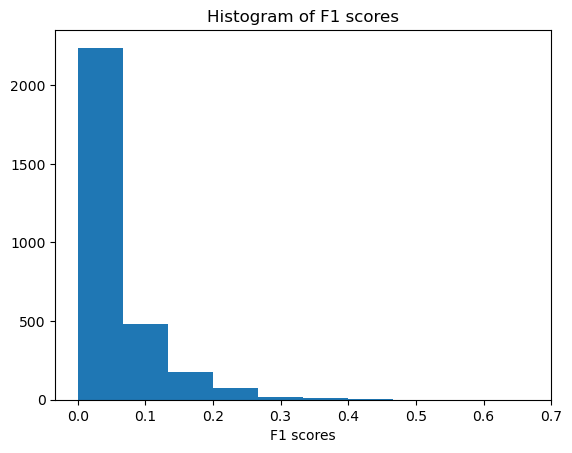

In [170]:
fig, ax = plt.subplots()
ax.set_title("Histogram of F1 scores")
ax.set_xlabel("F1 scores")
ax.set_ylabel("")
plt.hist(eval_f1s)

(array([2.319e+03, 4.350e+02, 1.390e+02, 6.800e+01, 2.800e+01, 6.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667]),
 <BarContainer object of 10 artists>)

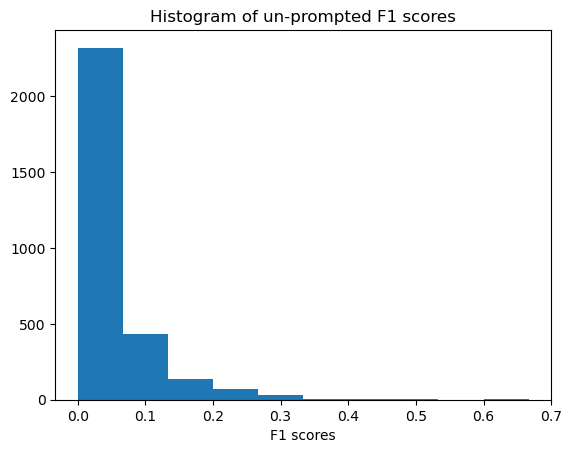

In [172]:
fig, ax = plt.subplots()
ax.set_title("Histogram of un-prompted F1 scores")
ax.set_xlabel("F1 scores")
ax.set_ylabel("")
plt.hist(np_f1s)

(array([964., 996., 422., 200., 130.,  86.,  71.,  53.,  40.,  39.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

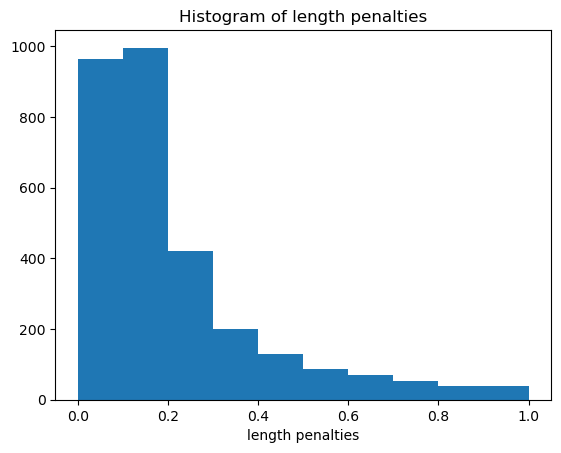

In [132]:
fig, ax = plt.subplots()
ax.set_title("Histogram of length penalties")
ax.set_xlabel("length penalties")
ax.set_ylabel("")
plt.hist(eval_lens)

(array([970., 979., 439., 189., 141.,  72.,  62.,  59.,  47.,  43.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

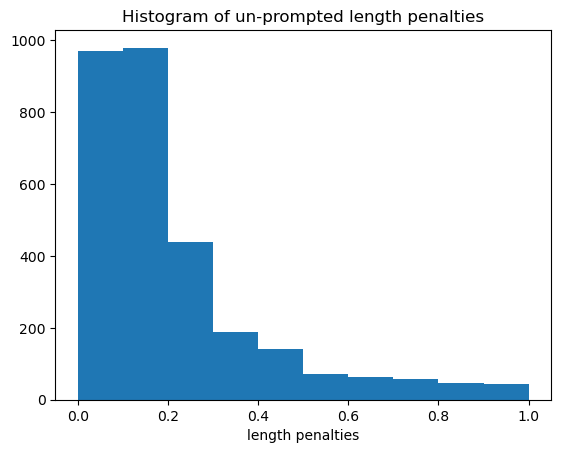

In [173]:
fig, ax = plt.subplots()
ax.set_title("Histogram of un-prompted length penalties")
ax.set_xlabel("length penalties")
ax.set_ylabel("")
plt.hist(np_lens)

In [114]:
eval_f1s

array([0.        , 0.        , 0.        , ..., 0.04545455, 0.04761905,
       0.18181818])

2001